In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import find_outliers, convert_age_from_days_to_years, extractqrcode, draw_age_distribution, calculate_code_age_distribution

In [2]:
# for pixel outliers
def get_qrcode(artifact:str) -> str:
    return artifact.split('_')[1]

def get_path(row: pd.Series) -> str:
    return f"{str(DATASET_PATH)}/scans/{row.qrcode}/{row.key}/{row.artifact}"

### Total no. of artifacts in dataset

In [3]:
DATASET_PATH = Path('/mnt/datasets/95k_depthmap_trainingdata')

In [4]:
! ls /mnt/datasets/95k_depthmap_trainingdata/scans/1585354326-lzswk9gx7u/101/pc_1585354326-lzswk9gx7u_1592715743641_101_007.p

/mnt/datasets/95k_depthmap_trainingdata/scans/1585354326-lzswk9gx7u/101/pc_1585354326-lzswk9gx7u_1592715743641_101_007.p


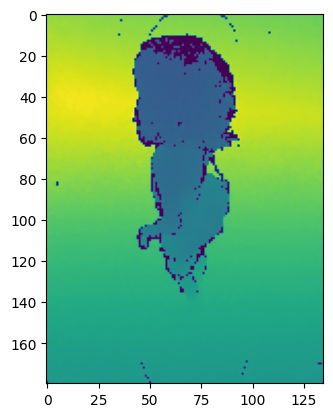

In [6]:
paths  = DATASET_PATH / 'scans/1585354326-lzswk9gx7u/101/pc_1585354326-lzswk9gx7u_1592715743641_101_010.p'
depthmap, targets = pickle.load(open(paths, "rb"))
_ = plt.imshow(np.squeeze(depthmap))
plt.show()

In [13]:
print("targets: ", targets)
print("targets.shape: ", targets.shape)
print("depthmap.shape: ", depthmap.shape)

targets:  [94.2  11.95]
targets.shape:  (2,)
depthmap.shape:  (180, 135, 1)


In [18]:
artifacts = pd.read_csv(DATASET_PATH / 'labels/training.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 96026


,artifact,storage_path,height,weight,key,age
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
1,pc_1583438052-nxew87bcv0_1591122011044_100_004.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
2,pc_1583438052-nxew87bcv0_1591122011044_100_005.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
3,pc_1583438052-nxew87bcv0_1591122011044_100_006.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
4,pc_1583438052-nxew87bcv0_1591122011044_100_007.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260


In [20]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(convert_age_from_days_to_years, axis=1)
artifacts.head()

,artifact,storage_path,height,weight,key,age,Years
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
1,pc_1583438052-nxew87bcv0_1591122011044_100_004.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
2,pc_1583438052-nxew87bcv0_1591122011044_100_005.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
3,pc_1583438052-nxew87bcv0_1591122011044_100_006.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
4,pc_1583438052-nxew87bcv0_1591122011044_100_007.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3


### Total no. of children in the dataset

In [21]:
artifacts['qrcode'] = artifacts.apply(extractqrcode, axis=1)
scans = artifacts.drop_duplicates(subset='qrcode', keep='first')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 4858


,artifact,storage_path,height,weight,key,age,Years,qrcode
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.30,100,1260,3,1583438052-nxew87bcv0
11,pc_1583438084-zkafuhr4xx_1591122031563_100_000.p,qrcode/1583438084-zkafuhr4xx/measure/159112203...,104.4,14.80,100,1283,3,1583438084-zkafuhr4xx
24,pc_1583438117-71v1y4z0gd_1592711198959_100_000.p,qrcode/1583438117-71v1y4z0gd/measure/159271119...,104.1,14.75,100,1398,3,1583438117-71v1y4z0gd
33,pc_1583438117-spfyeecneo_1591122016705_100_000.p,qrcode/1583438117-spfyeecneo/measure/159112201...,98.3,12.55,100,1640,4,1583438117-spfyeecneo
48,pc_1583438127-xt6z0e0tsu_1591122024547_100_000.p,qrcode/1583438127-xt6z0e0tsu/measure/159112202...,89.7,11.50,100,140,0,1583438127-xt6z0e0tsu


In [14]:
scans.describe()

,height,weight,key,age,Years
count,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000
mean,86.552491,10.951952,119.711198,934.587073,2.136888
std,11.742379,2.586094,40.019281,1133.370280,3.024094
min,7.900000,3.200000,100.000000,0.000000,0.000000
25%,77.925000,9.000000,100.000000,342.000000,0.000000
50%,88.050000,11.100000,100.000000,933.000000,2.000000
75%,95.600000,12.850000,101.000000,1420.750000,3.000000
max,114.700000,19.000000,202.000000,18179.000000,49.000000


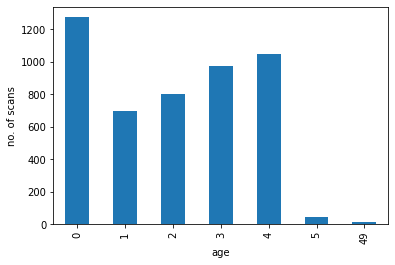

In [15]:
plt.figure()
draw_age_distribution(scans)
plt.show()

101    39059
100    24872
102    23301
202     6378
201     1292
200     1124
Name: key, dtype: int64


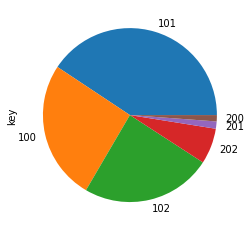

In [16]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
_ = artifacts['key'].value_counts().plot(kind='pie')

In [22]:
calculate_code_age_distribution(artifacts, "key")

2021-08-09 12:25:45,710 - INFO - key - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 53


,0,1,2,3,4
codes,,,,,
100,5111,1390,4639,6282,7162
101,7759,1566,6239,10973,12134
102,4955,999,4140,5998,6908
200,531,544,24,7,7
201,658,589,0,8,11
202,3120,3038,137,46,7


In [23]:
calculate_code_age_distribution(scans, "key")

2021-08-09 12:25:55,515 - INFO - key - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 53


,0,1,2,3,4
codes,,,,,
100,684,205,689,881,968
101,75,23,45,54,50
102,61,20,51,30,31
200,66,67,3,1,1
201,40,40,0,1,0
202,349,342,16,5,0


### Distribution of height, weight and age against each other

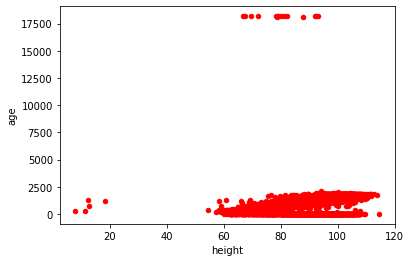

In [19]:
#distribution of height against age
height_vs_age = scans.plot.scatter(x='height', y='age', c='red')

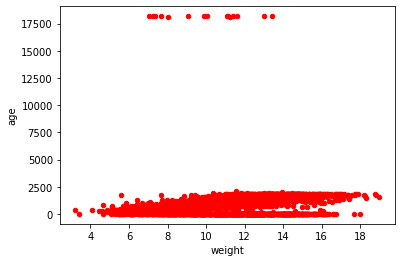

In [20]:
#distribution of weight against age
weight_vs_age = scans.plot.scatter(x='weight', y='age', c='red')

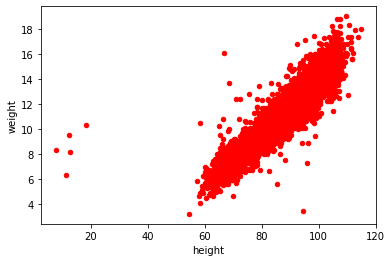

In [21]:
## distribution of height against weight
weight_vs_height = scans.plot.scatter(x='height', y='weight', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [22]:
artifacts.describe()

,height,weight,key,age,Years
count,96026.000000,96026.000000,96026.000000,96026.000000,96026.000000
mean,89.442885,11.557859,110.196291,1010.624498,2.347093
std,10.683023,2.354290,29.030214,924.643606,2.422921
min,7.900000,3.200000,100.000000,0.000000,0.000000
25%,83.200000,10.000000,100.000000,437.000000,1.000000
50%,90.800000,11.700000,101.000000,1130.000000,3.000000
75%,97.200000,13.250000,102.000000,1503.000000,4.000000
max,114.700000,19.000000,202.000000,18179.000000,49.000000


### 1) Check age

##### Check age < 6 months or  > 6 years

In [24]:
find_outliers(artifacts, 'age', '<365/2', data_id_name='qr')

2021-08-09 12:26:11,674 - INFO - Running the following query: @df.age<365/2 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 67
2021-08-09 12:26:11,697 - INFO - No. of outliers: 1009 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 78


['1583438127-xt6z0e0tsu',
 '1583462523-zolqj1h1so',
 '1583462542-nvwrue6sak',
 '1583465210-i5o9ye0f7y',
 '1583465223-o48oq5cow7',
 '1583465279-x22pprs96h',
 '1583465285-korju92su7',
 '1583465354-bpwt1kjvie',
 '1583465441-o63jswqdi6',
 '1583509239-rm7c0wryz7',
 '1583509243-hnuufbs00f',
 '1583509247-s0tyn6p2po',
 '1583509252-cz3nig7k49',
 '1583509261-0q1wtexp2w',
 '1583509359-dcs5c8f3yf',
 '1583509396-yquxv3fdnx',
 '1583509661-ysgg2ax7xr',
 '1583562305-8rffh5yasp',
 '1583655224-mdlgtfcuqd',
 '1583831700-0w3gzgbwci',
 '1583831791-fpncx73sp8',
 '1583831893-y533ypms77',
 '1583850151-7lqggqjbfz',
 '1583997887-kjl2onswvl',
 '1583998466-92e41regoe',
 '1584749198-hep3fegoiv',
 '1584749525-0kg15htr2u',
 '1584749533-f05glcu1g3',
 '1584749560-52k0733eqj',
 '1584749569-okss5ik7km',
 '1584749596-6ovictsvtz',
 '1584750047-e1ydqnj3xf',
 '1584750071-i44pm1b6j1',
 '1584750082-7y549ei3rw',
 '1584750318-oycdh7s35s',
 '1584750385-86jp7bipsm',
 '1584750393-r1yiighi2u',
 '1584750399-k93ugqgglq',
 '1584750403

In [25]:
find_outliers(artifacts, 'age', '>365*6', data_id_name='qr')

2021-08-09 12:26:36,020 - INFO - Running the following query: @df.age>365*6 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 67
2021-08-09 12:26:36,027 - INFO - No. of outliers: 15 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 78


['1583710796-p68osilppn',
 '1583831904-13qoxucgul',
 '1584751648-u50v4ryc54',
 '1585001805-bv723pvcy0',
 '1585361240-nievyiqbdv',
 '1584998005-c5ddnj0vuc',
 '1584751846-e0ro1v86r2',
 '1584996738-hyxlj4cees',
 '1585011032-l23rao0l8r',
 '1585355880-o0kqvrzncj',
 '1585005264-o4vjkmj3o5',
 '1584995539-iry2pwtgjy',
 '1585274328-7g4vj56tk8',
 '1584995460-ewet5gjfer',
 '1585001723-az25md2fir']

### 2) Check weight

In [27]:
find_outliers(artifacts, 'weight', '<5.0', data_id_name='qr')

2021-08-05 14:04:12,121 - INFO - Running the following query: @df.weight<5.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-05 14:04:12,126 - INFO - No. of outliers: 12 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 73


['1585366271-ok8vyfgcdw',
 '1585268854-t9dc711wl2',
 '1583464618-et67nim5pv',
 '1584997150-17hbdbbvst',
 '1584998076-071u80jhgb',
 '1585003269-r6u05tzkj7',
 '1585008564-6b2vy7vcbe',
 '1585271708-jc2k2d03jd',
 '1585273422-lr31sn53h1',
 '1585273699-0o50bij8vh',
 '1585353338-boa4phzps5',
 '1585366660-6cqmyjhmxu']

In [28]:
find_outliers(artifacts, 'weight', '>30.0', data_id_name='qr')

2021-08-05 14:04:23,285 - INFO - Running the following query: @df.weight>30.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-05 14:04:23,289 - INFO - No. of outliers: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 73


[]

### 3) Check height

In [29]:
find_outliers(artifacts, 'height', '<40.0', data_id_name='qr')

2021-08-05 14:04:39,426 - INFO - Running the following query: @df.height<40.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-05 14:04:39,431 - INFO - No. of outliers: 6 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 73


['1583855791-ldfc59ywg5',
 '1583997882-3jqstr1119',
 '1584998372-d85ogmqucw',
 '1585274424-3oqa4i262a',
 '1585366118-qao4zsk0m3',
 '1585360775-fa64muouel']

In [30]:
find_outliers(artifacts, 'height', '>150.0', data_id_name='qr')

2021-08-05 14:04:50,913 - INFO - Running the following query: @df.height>150.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-05 14:04:50,919 - INFO - No. of outliers: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 73


[]

### 4) Check pixel values

In [29]:
# check for depthmap pixel values < 0 and > 10, values found by MH through investigation
artifacts['qrcode'] = artifacts.storage_path.apply(get_qrcode)
artifacts['path'] = artifacts.apply(get_path, axis=1)

In [30]:
artifacts.head()

,artifact,storage_path,height,weight,key,age,Years,qrcode,path
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3,1583438052-nxew87bcv0,/mnt/datasets/95k_depthmap_trainingdata/scans/...
1,pc_1583438052-nxew87bcv0_1591122011044_100_004.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3,1583438052-nxew87bcv0,/mnt/datasets/95k_depthmap_trainingdata/scans/...
2,pc_1583438052-nxew87bcv0_1591122011044_100_005.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3,1583438052-nxew87bcv0,/mnt/datasets/95k_depthmap_trainingdata/scans/...
3,pc_1583438052-nxew87bcv0_1591122011044_100_006.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3,1583438052-nxew87bcv0,/mnt/datasets/95k_depthmap_trainingdata/scans/...
4,pc_1583438052-nxew87bcv0_1591122011044_100_007.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3,1583438052-nxew87bcv0,/mnt/datasets/95k_depthmap_trainingdata/scans/...


In [31]:
! ls {artifacts.path.iloc[0]}

/mnt/datasets/95k_depthmap_trainingdata/scans/1583438052-nxew87bcv0/100/pc_1583438052-nxew87bcv0_1591122011044_100_000.p


In [ ]:
unusual_pixel_artifacts = []
for path in tqdm(artifacts['path']):
    depthmap, targets = pickle.load(open(path, "rb"))
    max_value = depthmap.max()
    if max_value >= 10:
        unusual_pixel_artifacts.append(path)
        print(f"{path} has a (unexpectedly big) maximal pixel value of {max_value}")
    min_value = depthmap.min()
    if min_value < 0:
        unusual_pixel_artifacts.append(path)
        print(f"{path} has a (unexpectedly small) minimal pixel value of {max_value}")

  3%|▎         | 2505/96026 [01:33<50:35, 30.81it/s]  

In [ ]:
unusual_pixel_artifacts

##### Find outlier qr-codes for depthmap pixel values < 0 and > 10

In [ ]:
unusual_qrcodes_pixel = str(unusual_pixel_artifacts).split('/')[5]
print(len(unusual_pixel_artifacts))
print(unusual_qrcodes_pixel)